######  <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#35c337">Support Vector Machine (SVM)

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#a9c335">Importing libraries

In [1]:
import sys
import numpy as np
import pandas as pd
import pickle
from sklearn import model_selection, svm, preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import seaborn as sns
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#a9c335">Load train and test data

In [2]:
train = pd.read_csv("~/Desktop/Analysis/Work/ML_EIT/Data/MNIST_train.csv")
test = pd.read_csv("~/Desktop/Analysis/Work/ML_EIT/Data/MNIST_test.csv")

In [3]:
test

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9995,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,9996,9996,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,9997,9997,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,9998,9998,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#56c335">Train and Test data shape

In [4]:
print(train.shape,test.shape)

(60000, 787) (10000, 787)


In [5]:
print(train.labels,test['labels'])

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: labels, Length: 60000, dtype: int64 0       7
1       2
2       1
3       0
4       4
       ..
9995    2
9996    3
9997    4
9998    5
9999    6
Name: labels, Length: 10000, dtype: int64


######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#35c370">Train and Test data shape

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 787 entries, Unnamed: 0 to 783
dtypes: int64(787)
memory usage: 360.3 MB


######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#35c3a2">Each labels count

In [7]:
test_cnt = Counter(test.labels)
train_cnt = Counter(train['labels'])
print(test_cnt)
print(train_cnt)

Counter({1: 1135, 2: 1032, 7: 1028, 3: 1010, 9: 1009, 4: 982, 0: 980, 8: 974, 6: 958, 5: 892})
Counter({1: 6742, 7: 6265, 3: 6131, 2: 5958, 9: 5949, 0: 5923, 6: 5918, 8: 5851, 4: 5842, 5: 5421})


######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#3598c3">Visualization

Text(0.5, 1.0, 'Test dataset')

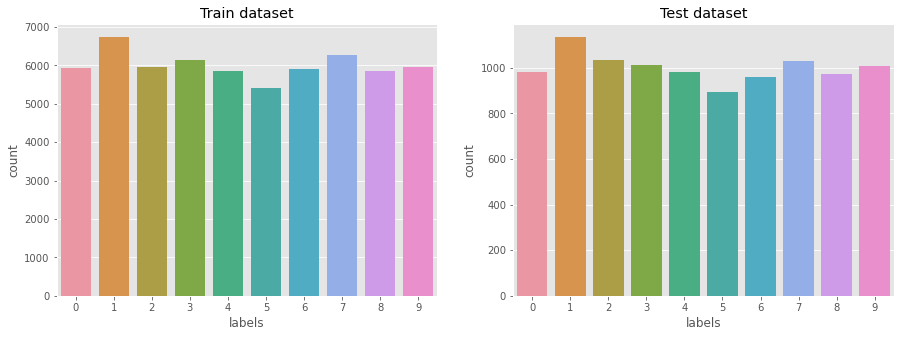

In [8]:
f, axes = plt.subplots(ncols=2, figsize=(15, 5))

sns.countplot(train.labels,ax=axes[0])
axes[0].set_title('Train dataset')

sns.countplot(test.labels,ax=axes[1])
axes[1].set_title('Test dataset')

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#35c3a2">Each label count

In [9]:
lbls = train['labels'].unique()
cnts = train['labels'].value_counts()
lbls,cnts

(array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8]),
 1    6742
 7    6265
 3    6131
 2    5958
 9    5949
 0    5923
 6    5918
 8    5851
 4    5842
 5    5421
 Name: labels, dtype: int64)

In [10]:
lbls

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8])

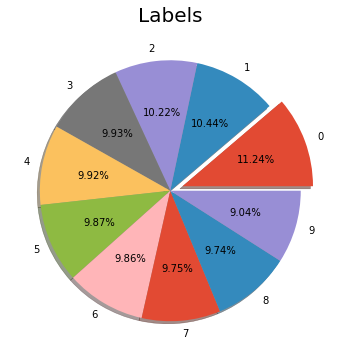

In [11]:
labls = ['0', '1','2','3','4','5','6','7','8','9']
size = train['labels'].value_counts()
explode = [0.1,0,0,0,0,0,0,0,0,0]

plt.rcParams['figure.figsize'] = (6, 6)
plt.pie(size, explode = explode, labels = labls, shadow = True, autopct = '%.2f%%')
plt.title('Labels', fontsize = 20)
plt.axis('off')
# plt.legend()
plt.show()

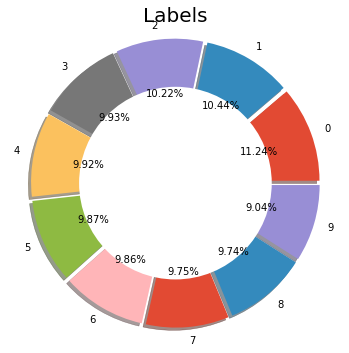

In [12]:
labls = ['0', '1','2','3','4','5','6','7','8','9']
size = train['labels'].value_counts()
explode = [0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05]

plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(size, explode = explode, labels = labls, shadow = True, autopct = '%.2f%%')
#        startangle=90, pctdistance=0.85)
plt.title('Labels', fontsize = 20)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre_circle)

#equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.tight_layout()
plt.show()

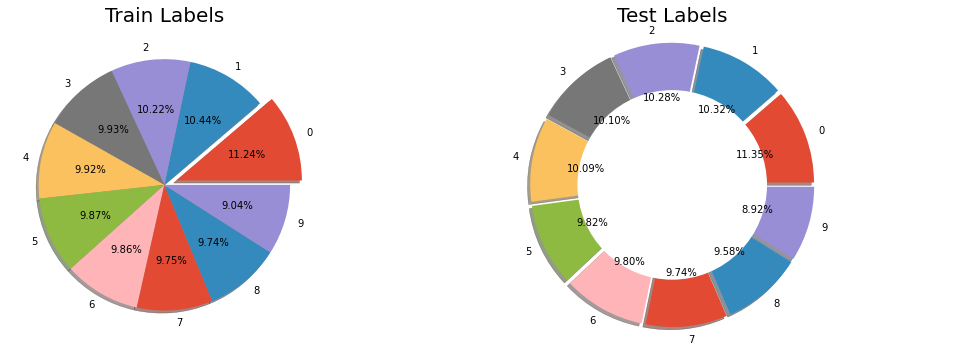

In [13]:
f, (ax1,ax2) = plt.subplots(ncols=2, figsize=(15, 5))

#first plot
labls = ['0', '1','2','3','4','5','6','7','8','9']
size = train['labels'].value_counts()
explode = [0.1,0,0,0,0,0,0,0,0,0]

ax1.pie(size, explode = explode, labels = labls, shadow = True, autopct = '%.2f%%')
ax1.set_title('Train Labels', fontsize = 20)
plt.axis('off')

#second plot
labls = ['0', '1','2','3','4','5','6','7','8','9']
size1 = test['labels'].value_counts()
explode1 = [0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05]

ax2.pie(size1, explode = explode1, labels = labls, shadow = True, autopct = '%.2f%%')
ax2.set_title('Test Labels', fontsize = 20)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre_circle)

#equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.tight_layout()
plt.show()

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#35c3a2">Change to numpy

In [14]:
# Change data set to numpy
test= test.to_numpy()
train = train.to_numpy()
print(train.shape,test.shape)

(60000, 787) (10000, 787)


######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#3546c3">Support Vector Machine (SVM)

In [15]:
Xtrain_imgs = np.asfarray(train[:,3:]) *(1/255)
Ytrain_labls = np.array(train[:,2])

test_imgs = np.asfarray(test[:,3:]) *(1/255)
test_lbls = np.asarray(test[:,2])
print(test_lbls[0:20])

# Prepare Classifier Training and Testing Data
# print('\nPreparing Classifier Training and Validation Data...')
X_train, X_test, y_train, y_test = model_selection.train_test_split(Xtrain_imgs,Ytrain_labls,test_size=0.2)


[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [16]:
## Pickle the Classifier for Future Use
## Support Vector Machine (SVM)

In [17]:
clf = svm.SVC(gamma=0.1, kernel='poly')
clf.fit(X_train,y_train)

#Save the model using pickle
# with open('MNIST_SVM.pickle','wb') as f:
# 	pickle.dump(clf, f)

#load the model pickle file
# pickle_in = open('MNIST_SVM.pickle','rb')
# clf = pickle.load(pickle_in)

SVC(gamma=0.1, kernel='poly')

In [18]:
print('\nCalculating Accuracy of trained Classifier...')
acc = clf.score(X_test,y_test)
print("SVM test data Accuracy: %0.4f" %(acc))


Calculating Accuracy of trained Classifier...
SVM test data Accuracy: 0.9788


######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#3546c3">Support Vector Machine (SVM) Metric

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics

y_pred = clf.predict(X_test)
# con_res = confusion_matrix(y_test,y_pred, labels=[0, 1])
con_res = metrics.confusion_matrix(y_test,y_pred)

print("Confusion matrix:")
print(confusion_matrix(y_test,y_pred))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

Confusion matrix:
[[1139    0    2    2    0    1    3    0    0    1]
 [   0 1320    4    2    1    0    0    2    1    1]
 [   6    4 1163    3    2    3    1    5    5    1]
 [   2    0    7 1221    0    6    0    4    8    5]
 [   3    6    6    1 1149    0    1    4    0    4]
 [   2    1    1    7    2 1020    5    2    5    4]
 [   3    0    1    0    3    4 1152    0    3    0]
 [   3    3    6    0    4    1    0 1255    0    9]
 [   4    9    1   11    4    6    2    1 1132    4]
 [   2    2    0   10   12    2    0    4    4 1195]]
Accuracy: 97.88%


######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#3546c3">Predict test images

In [20]:
test_labels_pred = clf.predict(test_imgs)
confmat_test = metrics.confusion_matrix(test_lbls,test_labels_pred)

print("Confusion matrix:")
print(confusion_matrix(y_test,y_pred))
print("Accuracy: {:.2f}%".format(accuracy_score(test_lbls, test_labels_pred)*100))

Confusion matrix:
[[1139    0    2    2    0    1    3    0    0    1]
 [   0 1320    4    2    1    0    0    2    1    1]
 [   6    4 1163    3    2    3    1    5    5    1]
 [   2    0    7 1221    0    6    0    4    8    5]
 [   3    6    6    1 1149    0    1    4    0    4]
 [   2    1    1    7    2 1020    5    2    5    4]
 [   3    0    1    0    3    4 1152    0    3    0]
 [   3    3    6    0    4    1    0 1255    0    9]
 [   4    9    1   11    4    6    2    1 1132    4]
 [   2    2    0   10   12    2    0    4    4 1195]]
Accuracy: 97.72%


######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#8d35c3">Show the test images with original and predected labels

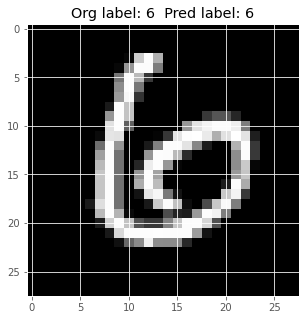

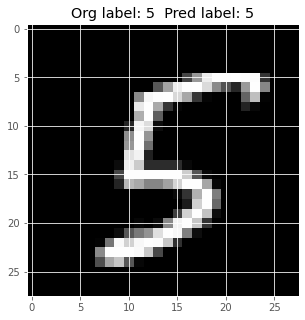

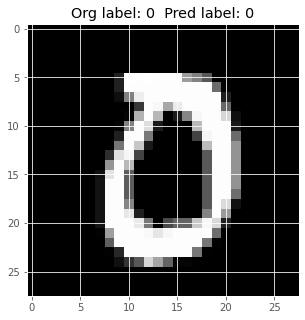

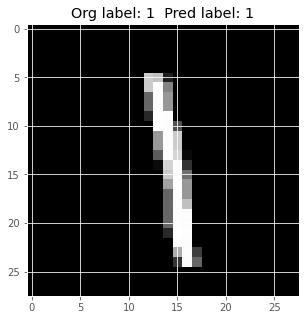

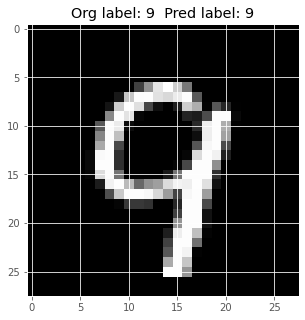

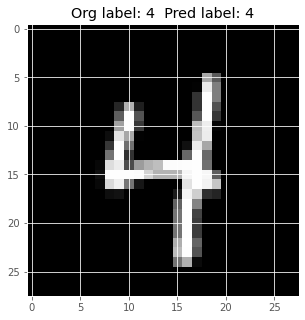

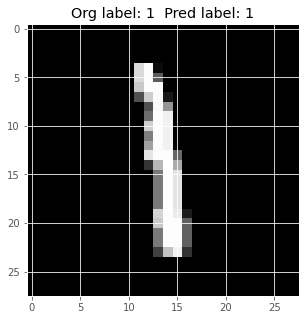

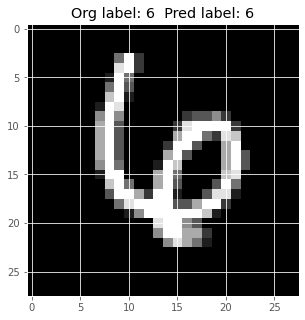

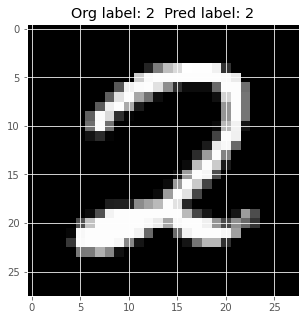

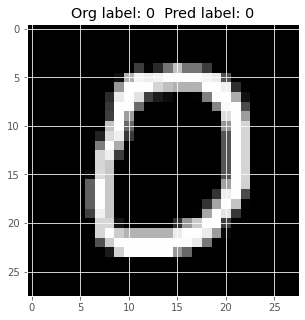

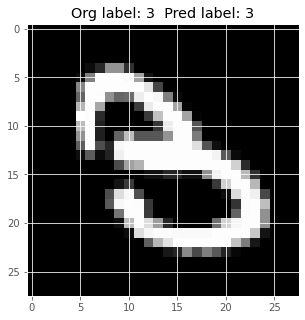

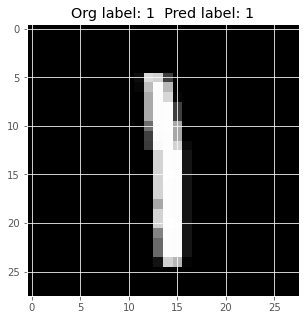

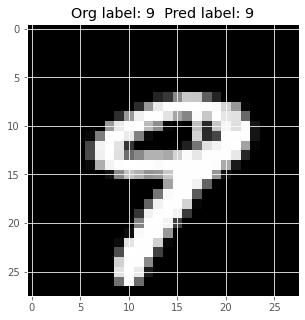

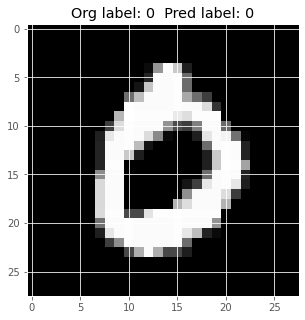

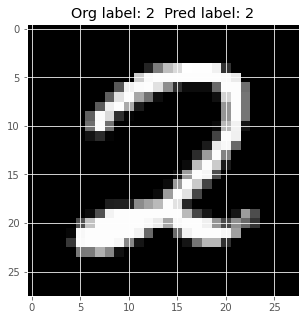

In [21]:
# Show the test images with original and predected labels

#pick the random values
nr = np.random.randint(1,40,15)

for i in nr:
    twod = (np.reshape(test_imgs[i], (28, 28))*255).astype(np.uint8)
    plt.title('Org label: {0}  Pred label: {1}'.format(test_lbls[i],test_labels_pred[i]))
    plt.imshow(twod, interpolation ='nearest', cmap='gray')
    plt.show()
    